In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
path = "movies.csv"                                     #MOVIES.CSV
moviescsv=pd.read_csv(path, usecols=['movieId','title','genres'], dtype={'movieId':'int32','title':'str'})
moviescsv.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
moviescsv.drop_duplicates(subset="title", keep='last',inplace=True)  #The 'inplace=True' ensures that the original 'movies' DataFrame is modified.
moviescsv

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)


In [4]:
import re #regularexpressions
import string
def clean_text_func(text):
    '''Make text lowercase, removing special characters'''
    text = text.lower()
    # remove multiple whitespaces
    text = re.sub('\s+',' ', text)
    # remove characters that not words
    text=re.sub('[^a-zA-Z0-9]',' ',text)
    return text

clean_text = lambda x: clean_text_func(x)    #This lambda function allows us to apply the cleaning function conveniently in a single line.

In [5]:
moviescsv.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [6]:
if 'all_data' not in moviescsv:                #this lines prevent from re-runing the data which causes multiple datasets.
    moviescsv['all_data'] = moviescsv[moviescsv.columns[3:]].apply(
        lambda x: ' '.join(x.astype(str)),
        axis=1
        )

In [7]:
import nltk
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords
import re
nltk.download('wordnet')

def lemma_tokens(tokens, lemma):
    lemma_result = [lemma.lemmatize(item) for item in tokens]
    return(lemma_result)

def tokenize(text):
    lemma = nltk.WordNetLemmatizer()
    text = re.sub("[^a-zA-Z]", " ", text)
    tokens = nltk.word_tokenize(text)

    # English Stop words
    # Re-add the additional stop words since we are recreating the document-term matrix
    stop_words = stopwords.words('english')

    # Remove all stop words: no_stops
    no_stops = [t for t in tokens if t not in stop_words]

    lemma = lemma_tokens(no_stops, lemma)
    return(lemma)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gauur\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [8]:
path2 = "ratings.csv"                                 #RATINGS.CSV
ratings = pd.read_csv(path2,
                      usecols=['userId', 'movieId', 'rating', 'timestamp'],
                      dtype={'userId': 'Int32', 'movieId': 'Int32', 'rating': 'float32'},
                      na_values={'userId': -1, 'movieId': -1, 'rating': 0.0})

ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1.147880e+09
1,1,306,3.5,1.147869e+09
2,1,307,5.0,1.147869e+09
3,1,665,5.0,1.147879e+09
4,1,899,3.5,1.147869e+09


In [9]:
tags = pd.read_csv("tags.csv")
tags.head(2)

,userId,movieId,tag,timestamp
0,3,260,classic,1.439472e+09
1,3,260,sci-fi,1.439472e+09


In [11]:
moviescsv['genres'] = moviescsv['genres'].str.replace('|', ' ')

In [12]:
ratings_t = ratings.groupby('userId').filter(lambda x: len(x) > 80)

In [13]:
movie_list_rating = ratings_t.movieId.unique().tolist()

In [14]:
movies = moviescsv[moviescsv.movieId.isin(movie_list_rating)]

In [15]:
movies.shape

(31520, 4)

In [17]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy
1,2,Jumanji (1995),Adventure Children Fantasy
2,3,Grumpier Old Men (1995),Comedy Romance
3,4,Waiting to Exhale (1995),Comedy Drama Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
62386,209049,No Safe Spaces (2019),Documentary
62388,209053,Bowling (2012),Comedy
62389,209055,"Very Well, Thank You (2007)",Comedy Drama
62401,209103,Tsar Ivan the Terrible (1991),(no genres listed)


In [18]:
tags.drop(['timestamp'], axis = 1, inplace = True)
ratings_t.drop(['timestamp'], axis = 1, inplace = True)

In [19]:
mixed = pd.merge(movies, tags, on='movieId', how = 'left')
mixed.head()

,movieId,title,genres,userId,tag
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,791.0,Owned
1,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,1048.0,imdb top 250
2,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,1361.0,Pixar
3,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,3164.0,Pixar
4,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,3164.0,time travel


In [20]:
mixed.fillna("", inplace = True)
mixed = pd.DataFrame(mixed.groupby('movieId')['tag'].apply(lambda x: "%s" % ' '.join(x)))

C:\Users\gauur\AppData\Local\Temp\ipykernel_4892\1285130730.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  mixed.fillna("", inplace = True)


In [21]:
Final = pd.merge(movies, mixed, on='movieId', how = 'left')
Final ['metadata'] = Final[['tag', 'genres']].apply(lambda x: ' '.join(x), axis = 1)

In [22]:
Final.head()

,movieId,title,genres,tag,metadata
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,Owned imdb top 250 Pixar Pixar time travel chi...,Owned imdb top 250 Pixar Pixar time travel chi...
1,2,Jumanji (1995),Adventure Children Fantasy,Robin Williams time travel fantasy,Robin Williams time travel fantasy Adventure C...
2,3,Grumpier Old Men (1995),Comedy Romance,funny,funny Comedy Romance
3,4,Waiting to Exhale (1995),Comedy Drama Romance,,Comedy Drama Romance
4,5,Father of the Bride Part II (1995),Comedy,,Comedy


In [23]:
Final.shape

(31520, 5)

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
tfidf = TfidfVectorizer(stop_words= 'english')

In [26]:
tfidf_matrix = tfidf.fit_transform(Final['metadata'])

In [27]:
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index = Final.index.tolist())
tfidf_df.shape

(31520, 5907)

In [28]:
from sklearn.decomposition import TruncatedSVD

In [43]:
svd = TruncatedSVD(n_components=150)
latent_matrix = svd.fit_transform(tfidf_df)

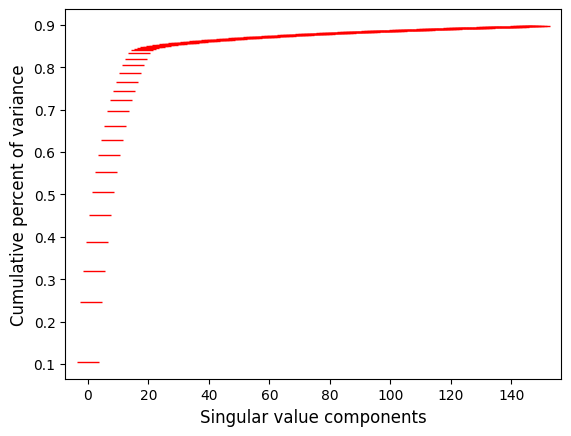

In [44]:
import matplotlib.pyplot as plt
explained = svd.explained_variance_ratio_.cumsum()
plt.plot(explained, '_', ms = 16, color = 'red')
plt.xlabel('Singular value components', fontsize = 12)
plt.ylabel('Cumulative percent of variance', fontsize = 12)
plt.show()

In [47]:
latent_matrix

array([[ 4.39438745e-02,  8.22038041e-02,  1.66866372e-02, ...,
         2.80872957e-02,  9.21187360e-03,  5.29239973e-02],
       [ 2.53771187e-02,  2.33067485e-02,  4.81968168e-02, ...,
         6.30530727e-03,  3.04829198e-03, -5.62765859e-03],
       [ 2.16464220e-01,  3.23014652e-01, -5.00638175e-02, ...,
        -4.33034443e-03,  7.16087078e-04, -1.69354555e-02],
       ...,
       [ 8.71696850e-01,  3.87625314e-01, -1.32933533e-01, ...,
         4.01571337e-05, -7.55445173e-05, -9.20693354e-06],
       [ 8.86330756e-05, -4.16458300e-06,  2.36098754e-04, ...,
        -6.03291748e-05,  2.19545505e-04, -2.02734637e-04],
       [ 8.71696850e-01,  3.87625314e-01, -1.32933533e-01, ...,
         4.01571337e-05, -7.55445173e-05, -9.20693354e-06]])

In [48]:
latent_matrix_df = pd.DataFrame(latent_matrix[:, 0:150], index=Final.title.tolist())
latent_matrix_df

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
Toy Story (1995),0.043944,0.082204,0.016687,0.001183,-0.011848,-0.044256,0.138356,0.204760,0.036566,-0.000031,...,0.014394,0.066160,0.022638,-0.014022,0.001268,-0.031720,0.029790,0.028087,0.009212,0.052924
Jumanji (1995),0.025377,0.023307,0.048197,0.000925,0.021120,-0.071701,0.213909,0.202216,0.043735,-0.000054,...,-0.003743,-0.005377,-0.013358,-0.000826,-0.009895,0.022983,0.002600,0.006305,0.003048,-0.005628
Grumpier Old Men (1995),0.216464,0.323015,-0.050064,-0.010456,0.334659,0.020287,-0.036277,-0.007512,-0.006756,-0.000225,...,0.015798,0.007295,-0.032096,0.006371,0.006845,-0.000892,-0.005218,-0.004330,0.000716,-0.016935
Waiting to Exhale (1995),0.756540,0.357591,-0.150740,-0.018229,0.516171,0.063038,-0.049452,-0.019047,-0.018687,-0.000691,...,0.000017,-0.000005,0.000075,0.000051,-0.000090,-0.000124,-0.000070,-0.000041,0.000016,0.000025
Father of the Bride Part II (1995),0.416150,0.878530,-0.054326,-0.008329,-0.212027,0.019122,-0.059158,-0.024692,-0.043551,0.000139,...,0.000037,-0.000025,0.000081,0.000063,-0.000029,0.000043,0.000025,0.000100,-0.000063,-0.000025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
No Safe Spaces (2019),0.011679,0.008837,0.034648,0.998669,0.017754,0.007242,-0.009083,-0.005950,-0.009437,-0.000064,...,0.000114,-0.000001,-0.000043,-0.000043,-0.000122,0.000150,0.000043,0.000052,0.000002,0.000036
Bowling (2012),0.416150,0.878530,-0.054326,-0.008329,-0.212027,0.019122,-0.059158,-0.024692,-0.043551,0.000139,...,0.000037,-0.000025,0.000081,0.000063,-0.000029,0.000043,0.000025,0.000100,-0.000063,-0.000025
"Very Well, Thank You (2007)",0.871697,0.387625,-0.132934,-0.006147,-0.255655,0.053256,-0.023229,-0.025492,-0.042823,0.000158,...,0.000005,0.000014,0.000045,0.000097,-0.000053,-0.000015,0.000037,0.000040,-0.000076,-0.000009
Tsar Ivan the Terrible (1991),0.000089,-0.000004,0.000236,-0.000018,0.001103,-0.000082,-0.000377,0.001175,-0.003042,0.999978,...,0.000284,-0.000557,0.000221,0.000188,-0.000074,0.000487,0.000107,-0.000060,0.000220,-0.000203


In [49]:
svd.explained_variance_ratio_.sum() #We see that it covers about 90% of our whole data.

0.8978007553589655

In [51]:
from sklearn.metrics.pairwise import cosine_similarity

In [84]:
from fuzzywuzzy import process #this is to get index of the movie

In [85]:
similarity = cosine_similarity(latent_matrix)

In [118]:
Final

,movieId,title,genres,tag,metadata
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,Owned imdb top 250 Pixar Pixar time travel chi...,Owned imdb top 250 Pixar Pixar time travel chi...
1,2,Jumanji (1995),Adventure Children Fantasy,Robin Williams time travel fantasy,Robin Williams time travel fantasy Adventure C...
2,3,Grumpier Old Men (1995),Comedy Romance,funny,funny Comedy Romance
3,4,Waiting to Exhale (1995),Comedy Drama Romance,,Comedy Drama Romance
4,5,Father of the Bride Part II (1995),Comedy,,Comedy
...,...,...,...,...,...
31515,209049,No Safe Spaces (2019),Documentary,,Documentary
31516,209053,Bowling (2012),Comedy,,Comedy
31517,209055,"Very Well, Thank You (2007)",Comedy Drama,,Comedy Drama
31518,209103,Tsar Ivan the Terrible (1991),(no genres listed),,(no genres listed)


In [154]:
genome_tags = pd.read_csv('genome-tags.csv')
genome_scores = pd.read_csv('genome-scores.csv')

In [155]:
genome_tags.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [156]:
processed_genome_scores = pd.pivot_table(genome_scores, values='relevance', index=['movieId'], columns = 'tagId')
processed_genome_scores.shape

(13816, 1128)

In [157]:
final_1 = processed_genome_scores

In [160]:
input_1 = latent_matrix_df.loc['Jumanji (1995)']
input_2 = final_1.iloc[1]

In [162]:
input_1 = np.array(input_1).reshape(1, -1)
input_2 = np.array(input_2).reshape(1, -1)
score_1 = cosine_similarity(latent_matrix_df,input_1).reshape(-1)
score_2 = cosine_similarity(final_1,input_2).reshape(-1)

In [164]:
score_1_df = pd.DataFrame(score_1, columns = ['score_1'], index = latent_matrix_df.index)
score_1_df

,score_1
Toy Story (1995),0.296270
Jumanji (1995),1.000000
Grumpier Old Men (1995),-0.000980
Waiting to Exhale (1995),0.000073
Father of the Bride Part II (1995),0.000030
...,...
No Safe Spaces (2019),0.000005
Bowling (2012),0.000030
"Very Well, Thank You (2007)",0.000037
Tsar Ivan the Terrible (1991),0.000038


In [165]:
score_2_df = pd.DataFrame(score_2, columns = ['score'], index = final_1.index)
score_2_df

,score
movieId,
1,0.776151
2,1.000000
3,0.679791
4,0.644311
5,0.650693
...,...
205072,0.692797
205076,0.578015
205383,0.665310


In [166]:
final_score = pd.merge( movies,score_2_df, on='movieId', how='left')
final_score.drop('genres',axis=1,inplace=True)
final_score.sort_values('score',ascending=False).head(20)

,movieId,title,score
1,2,Jumanji (1995),1.000000
1951,2054,"Honey, I Shrunk the Kids (1989)",0.881902
2321,2429,Mighty Joe Young (1998),0.859901
10528,46972,Night at the Museum (2006),0.857545
1746,1848,"Borrowers, The (1997)",0.834145
11629,58105,"Spiderwick Chronicles, The (2008)",0.830634
10043,40851,Zathura (2005),0.829164
3356,3489,Hook (1991),0.828662
475,480,Jurassic Park (1993),0.827205
1912,2015,"Absent-Minded Professor, The (1961)",0.825724
